In [1]:
from pyVHR.analysis.pipeline import DeepPipeline, Pipeline
import matplotlib.pyplot as plt

pipe = Pipeline()
pipeDL = DeepPipeline()

2022-09-09 11:36:30.677759: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [48]:
times, bpms, uncertainties, tittles, aproach, roi_met = [],[],[],[],[],[]


Processing Video: ./datasets/UBFC-RPPG/d2/subject1/vid.avi
Frames shape: (1547, 480, 640, 3)

BVP extraction with method: MTTS_CAN
16/16 [==============================] - 1s 44ms/step

BPM estimation with: welch

...done!



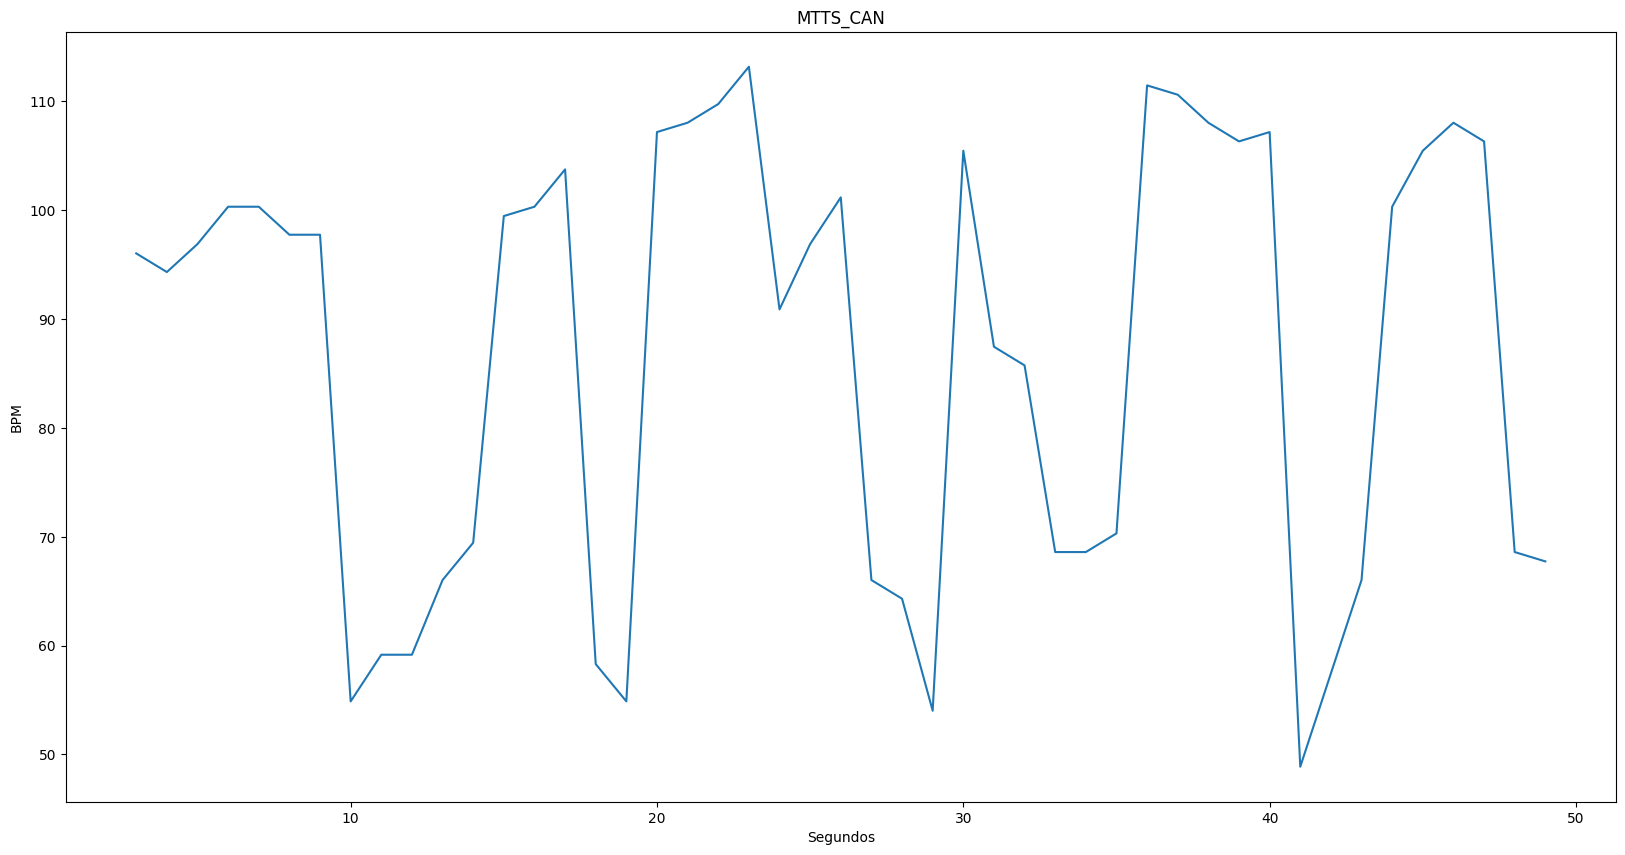

In [49]:
timedl, BPMdl =  pipeDL.run_on_video('./datasets/UBFC-RPPG/d2/subject1/vid.avi', method= 'MTTS_CAN')
plt.figure(1)
plt.title('MTTS_CAN')
plt.xlabel('Segundos')
plt.ylabel('BPM')
plt.plot(timedl, BPMdl)

times.append(timedl)
bpms.append(BPMdl)
uncertainties.append([0])
tittles.append('MTTS_CAN')
aproach.append([''])
roi_met.append([''])

# CUDA devices:  1
# device number  0 :  NVIDIA GeForce RTX 3060

Processing Video: datasets/UBFC-RPPG/d2/subject1/vid.avi

BVP extraction with method: cupy_POS

BPM estimation with: welch

...done!



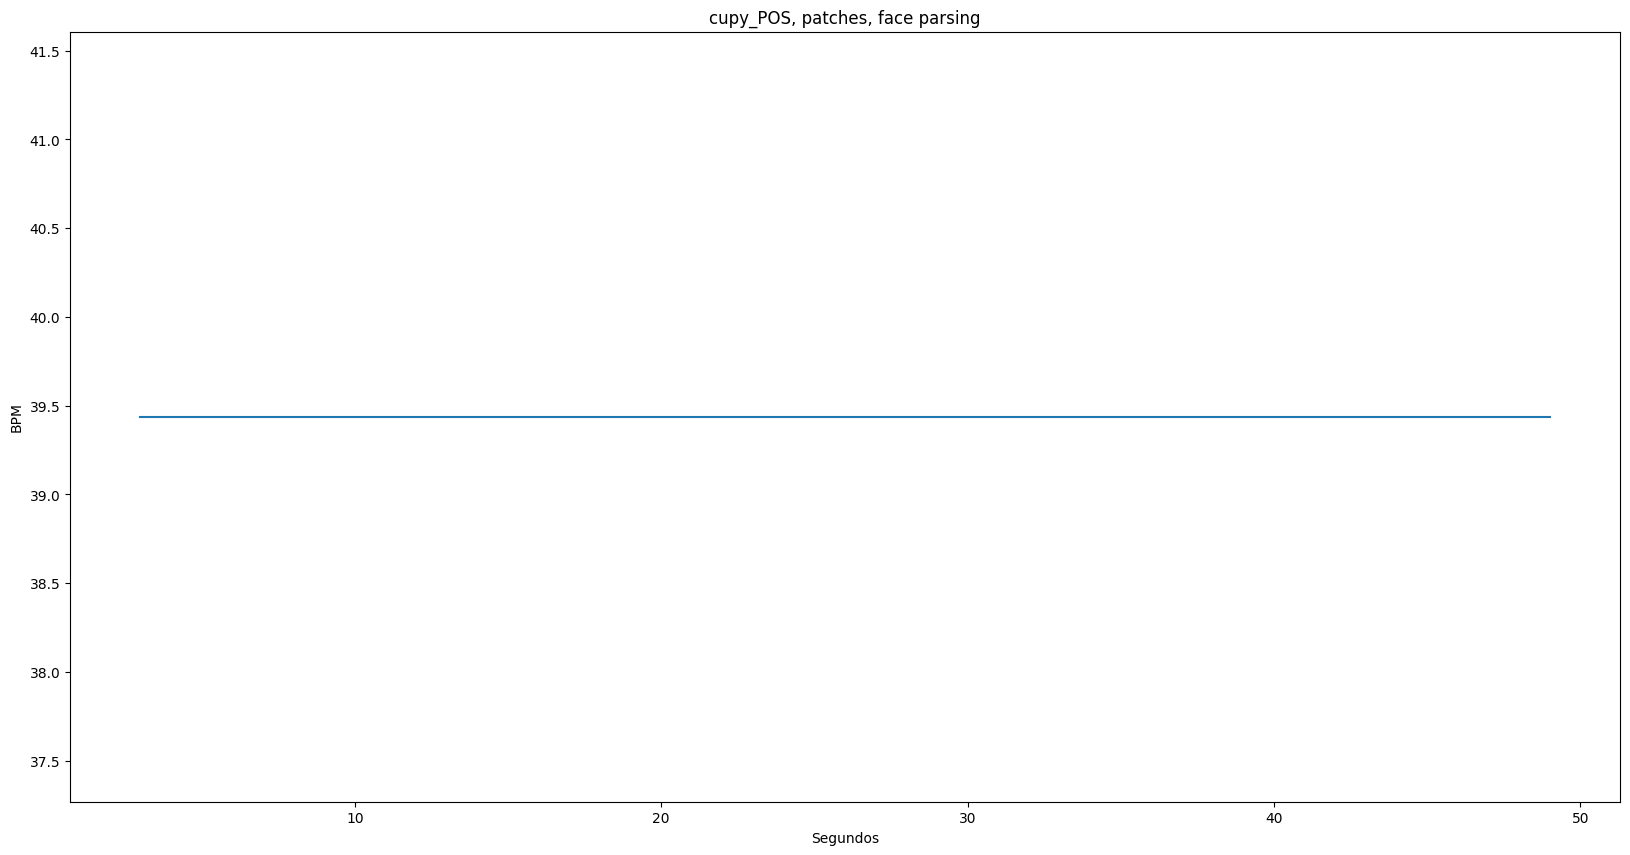

In [50]:
timed, BPMd, un = pipe.run_on_video('datasets/UBFC-RPPG/d2/subject1/vid.avi', method = 'cupy_POS', roi_approach="patches", roi_method="faceparsing")
plt.figure(1)
plt.title('cupy_POS, patches, face parsing')
plt.xlabel('Segundos')
plt.ylabel('BPM')
plt.plot(timed, BPMd)

times.append(timed)
bpms.append(BPMd)
uncertainties.append(un)
tittles.append('cupy_POS')
aproach.append(['patches'])
roi_met.append(['face parsing'])

# CUDA devices:  1
# device number  0 :  NVIDIA GeForce RTX 3060

Processing Video: datasets/UBFC-RPPG/d2/subject1/vid.avi

BVP extraction with method: cupy_POS

BPM estimation with: welch

...done!



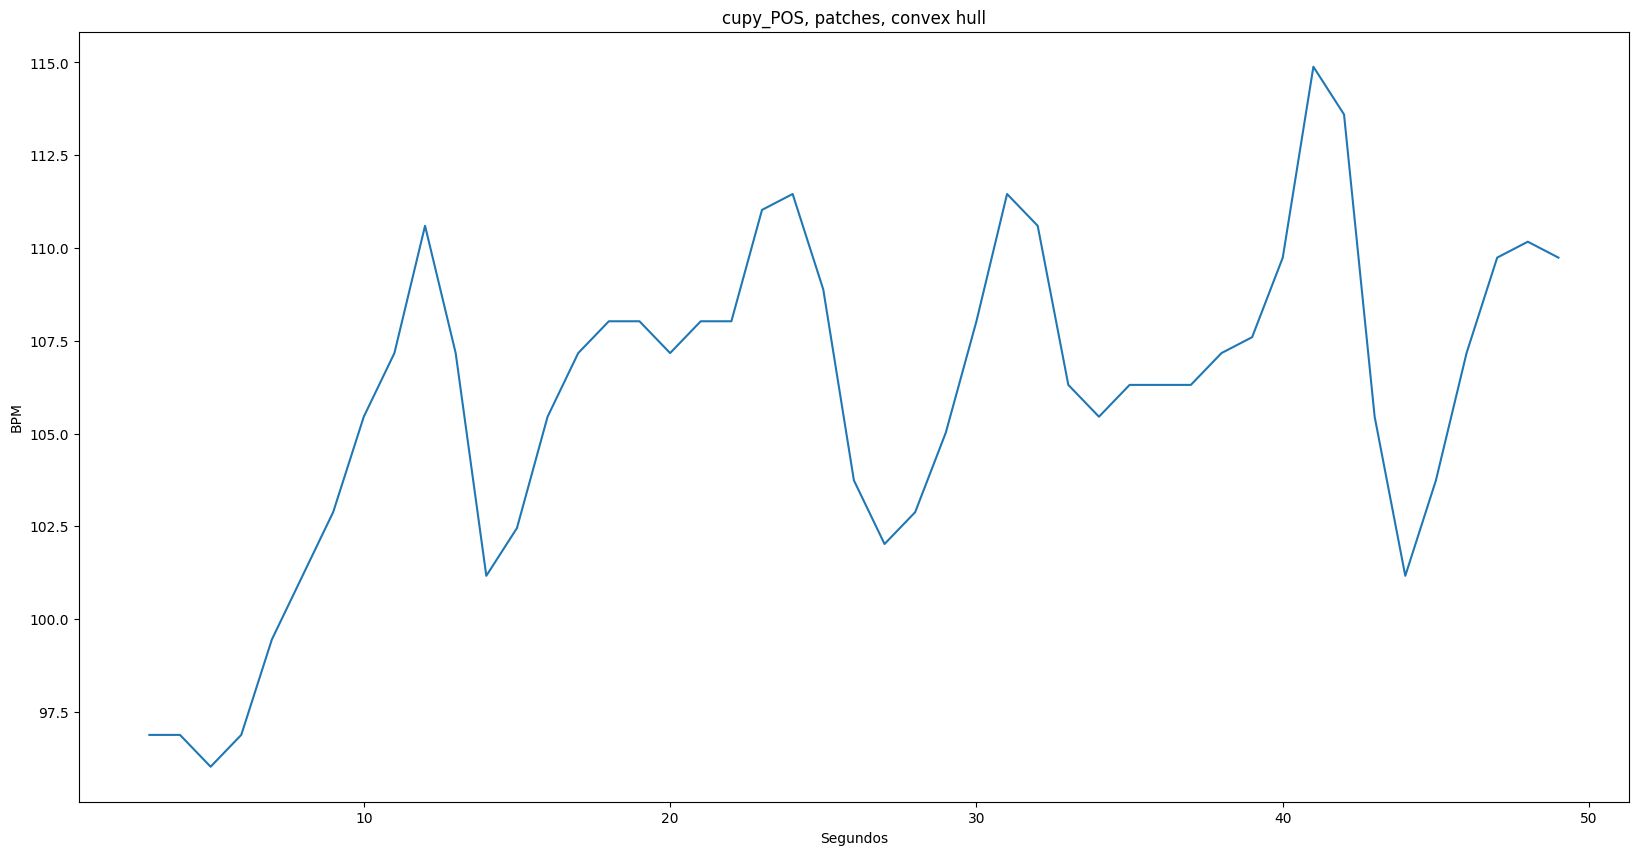

In [51]:
timed, BPMd, un = pipe.run_on_video('datasets/UBFC-RPPG/d2/subject1/vid.avi', method = 'cupy_POS', roi_approach="patches", roi_method="convexhull")
plt.figure(1)
plt.title('cupy_POS, patches, convex hull')
plt.xlabel('Segundos')
plt.ylabel('BPM')
plt.plot(timed, BPMd)

times.append(timed)
bpms.append(BPMd)
uncertainties.append(un)
tittles.append('cupy_POS')
aproach.append(['patches'])
roi_met.append(['convex hull']) 

# CUDA devices:  1
# device number  0 :  NVIDIA GeForce RTX 3060

Processing Video: datasets/UBFC-RPPG/d2/subject1/vid.avi

BVP extraction with method: cupy_POS

BPM estimation with: welch

...done!



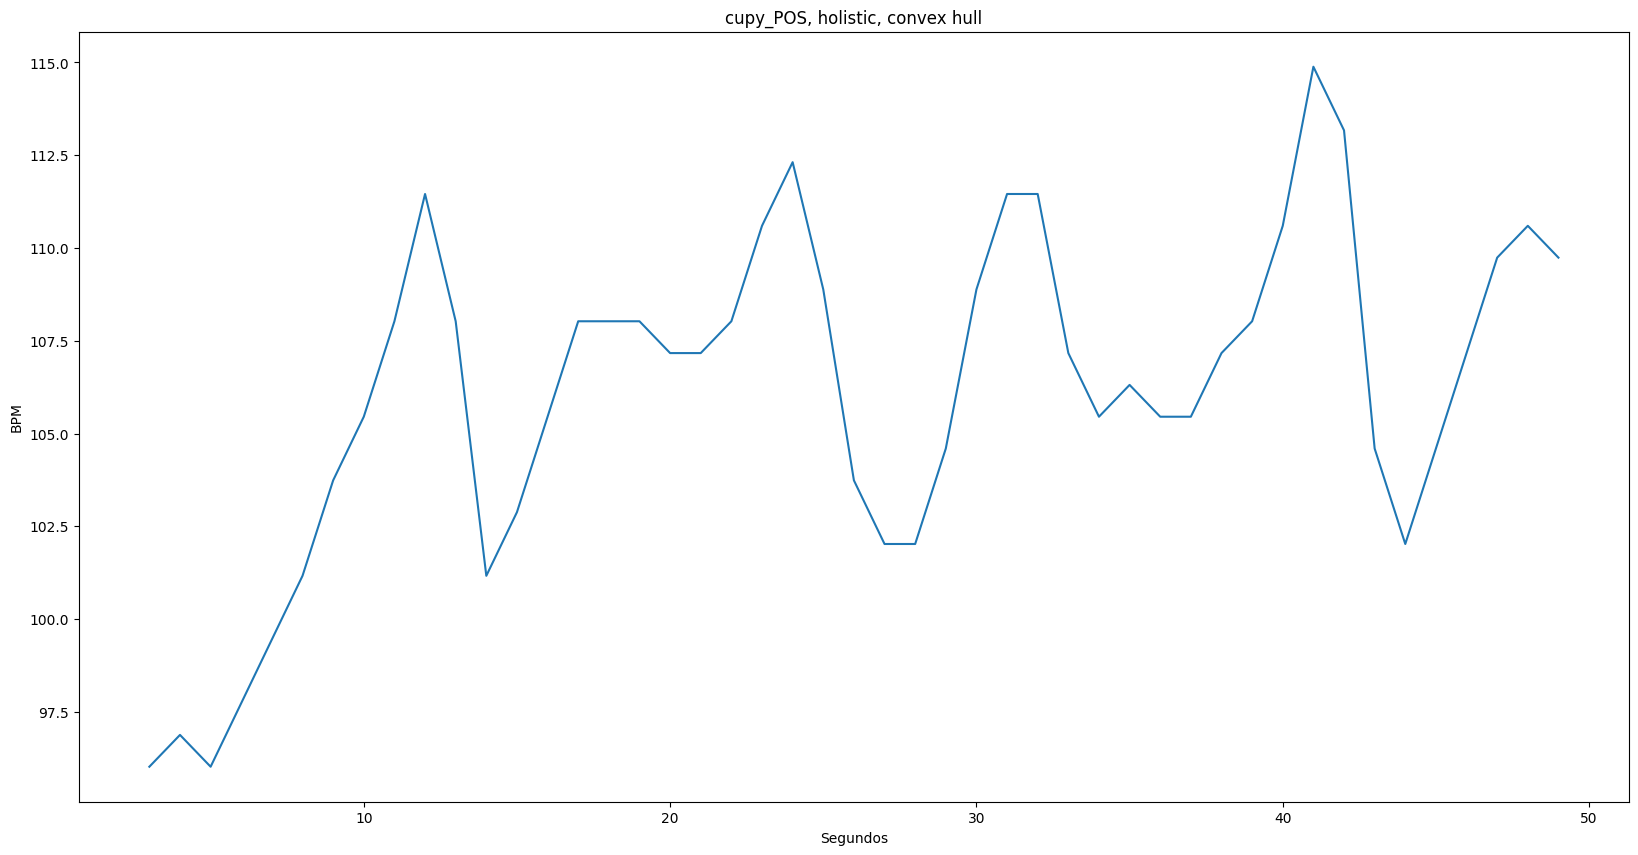

In [52]:
timed, BPMd, un = pipe.run_on_video('datasets/UBFC-RPPG/d2/subject1/vid.avi',cuda= True ,method = 'cupy_POS', roi_approach='holistic', roi_method='convexhull')
plt.figure(1)
plt.title('cupy_POS, holistic, convex hull')
plt.xlabel('Segundos')
plt.ylabel('BPM')
plt.plot(timed, BPMd)

times.append(timed)
bpms.append(BPMd)
uncertainties.append(un)
tittles.append('cupy_POS')
aproach.append(['holistic'])
roi_met.append(['convex hull'])

# CUDA devices:  1
# device number  0 :  NVIDIA GeForce RTX 3060

Processing Video: datasets/UBFC-RPPG/d2/subject1/vid.avi

BVP extraction with method: cupy_POS

BPM estimation with: welch

...done!



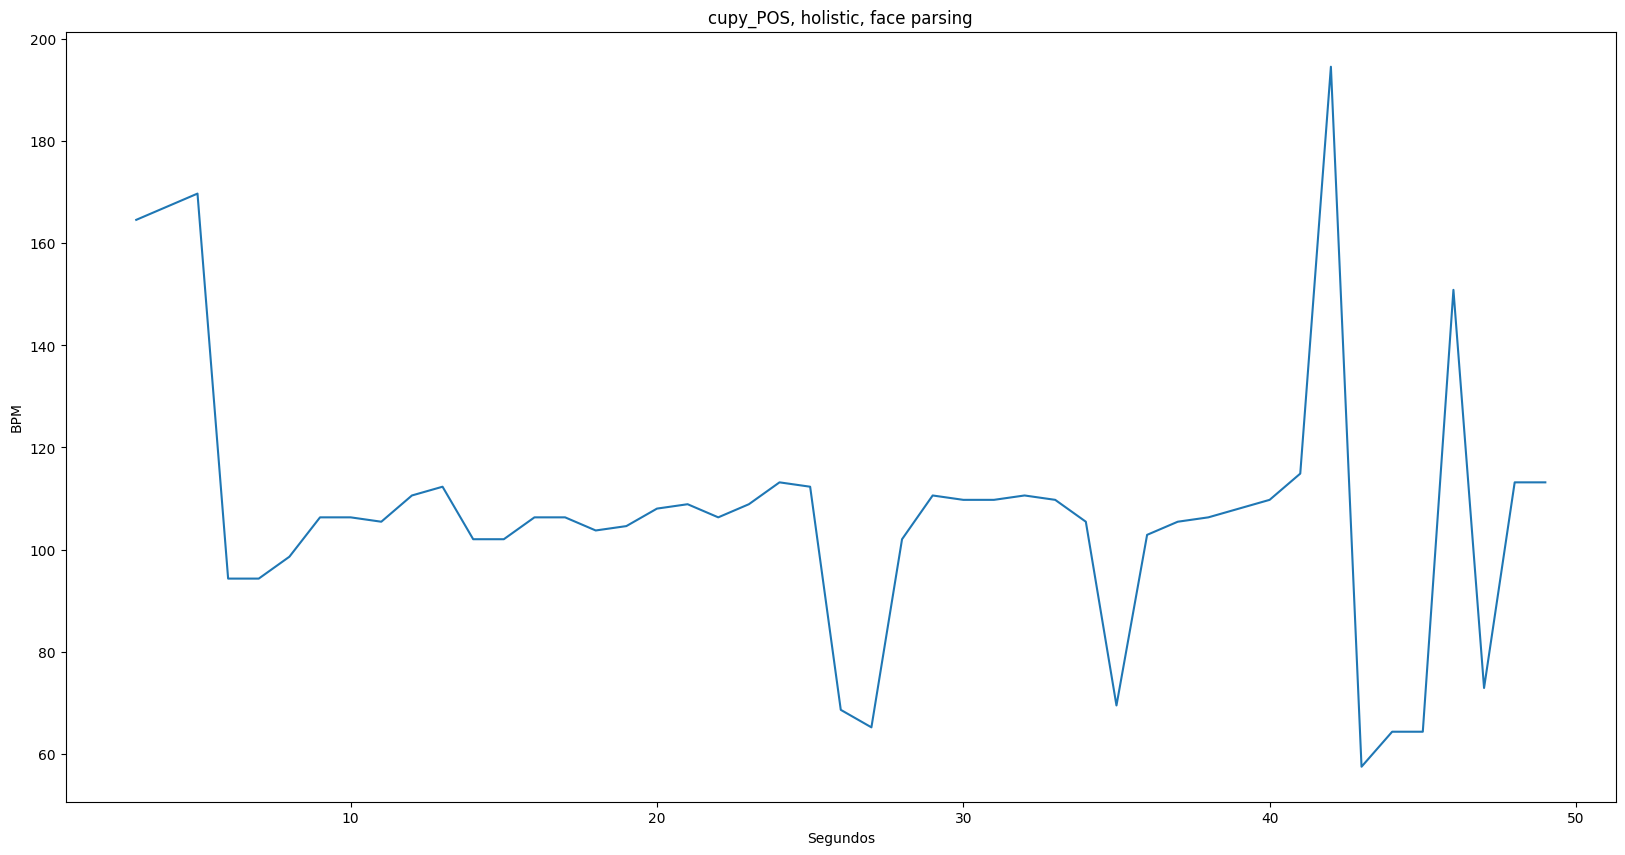

In [53]:
timed, BPMd, un = pipe.run_on_video('datasets/UBFC-RPPG/d2/subject1/vid.avi',cuda= True ,method = 'cupy_POS',  roi_approach='holistic', roi_method="faceparsing")
plt.figure(1)
plt.title('cupy_POS, holistic, face parsing')
plt.xlabel('Segundos')
plt.ylabel('BPM')
plt.plot(timed, BPMd)
times.append(timed)
bpms.append(BPMd)
uncertainties.append(un)
tittles.append('cupy_POS')
aproach.append(['holistic'])
roi_met.append(['face parsing'])

In [74]:
print("Before, figure default size is: ", plt.rcParams["figure.figsize"])
plt.rcParams["figure.figsize"] = (15, 10)
print("After, figure default size is: ", plt.rcParams["figure.figsize"])


Before, figure default size is:  [15.0, 15.0]
After, figure default size is:  [15.0, 10.0]


1 cupy_POS
2 cupy_POS
3 cupy_POS
4 cupy_POS


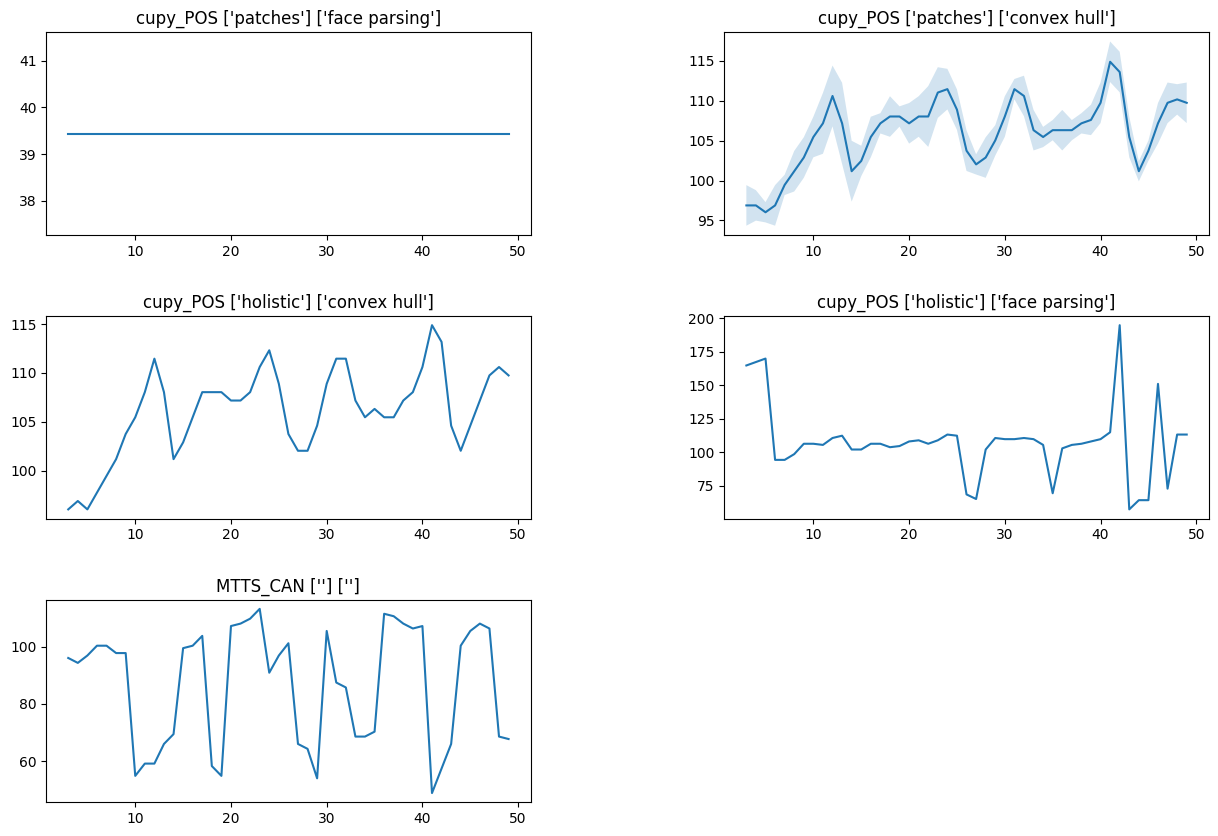

In [75]:

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,4+1):
    print(i,tittles[i])
    ax = fig.add_subplot(3, 2, i)
    ax.plot(times[i],bpms[i])
    ax.title.set_text(str(tittles[i])+' '+str(aproach[i])+' '+str(roi_met[i]))
    ax.fill_between(times[i], bpms[i]-uncertainties[i], bpms[i]+uncertainties[i], alpha=0.2)
ax = fig.add_subplot(3, 2, 5)
ax.plot(times[0],bpms[0])
ax.title.set_text(str(tittles[0])+' '+str(aproach[0])+' '+str(roi_met[0]))

In [46]:
len(times)

4